In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix

In [2]:
# Load the dataset
df = pd.read_csv(r'Churn_Modelling.csv')

In [3]:
# Dataset shape
print(df.shape)

(10000, 14)


In [4]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.drop("RowNumber", axis=1, inplace=True)
df.drop("CustomerId", axis=1, inplace=True)
df.drop("Surname", axis=1, inplace=True)

In [6]:
# Data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
# Summary statistics
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


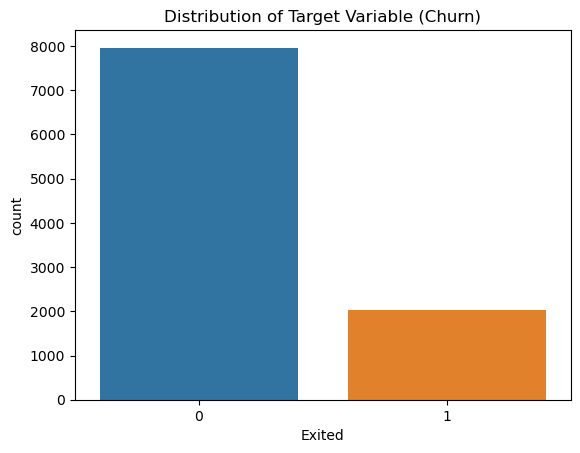

In [8]:
sns.countplot(x='Exited', data=df)
plt.title('Distribution of Target Variable (Churn)')
plt.show()

In [9]:
# Select numerical columns
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary','HasCrCard']

In [10]:
categorical_features = ['Geography', 'Gender']

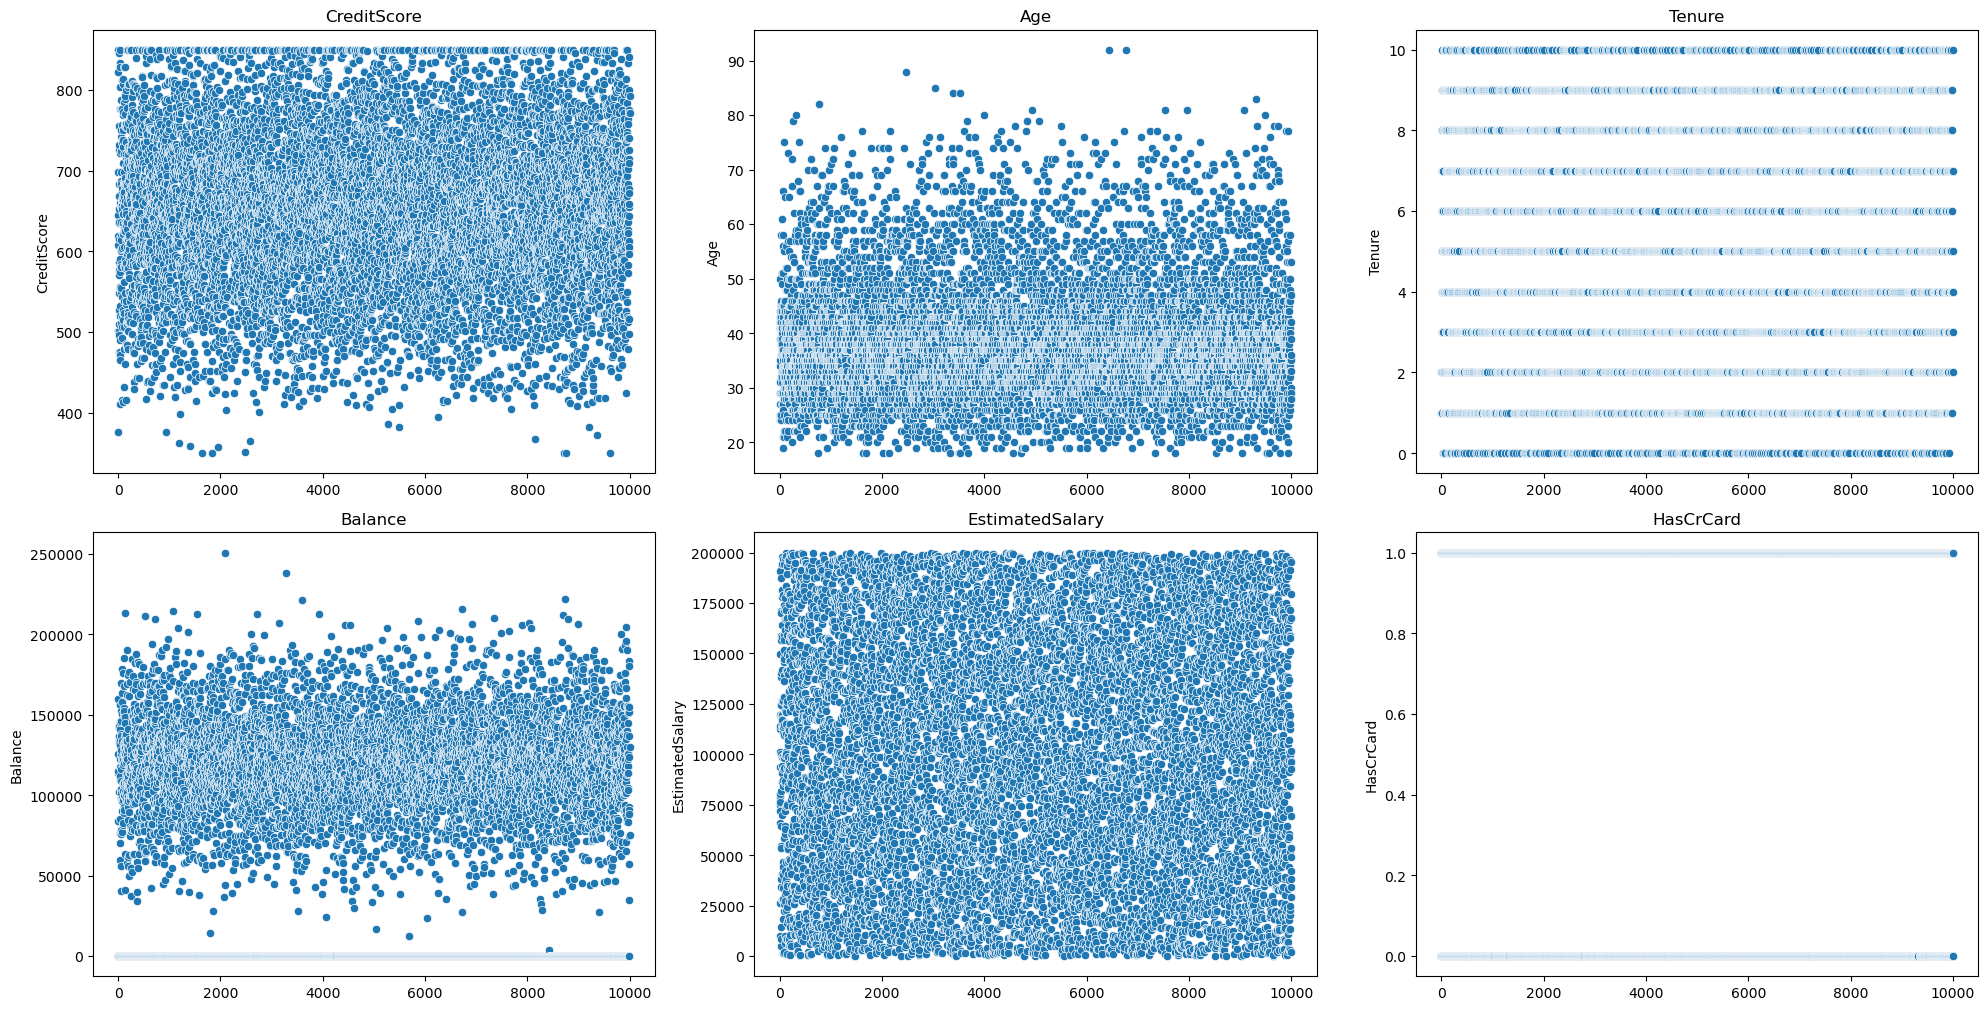

In [11]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)  # Adjust the grid size based on the number of numerical columns
    sns.scatterplot(x=df.index, y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

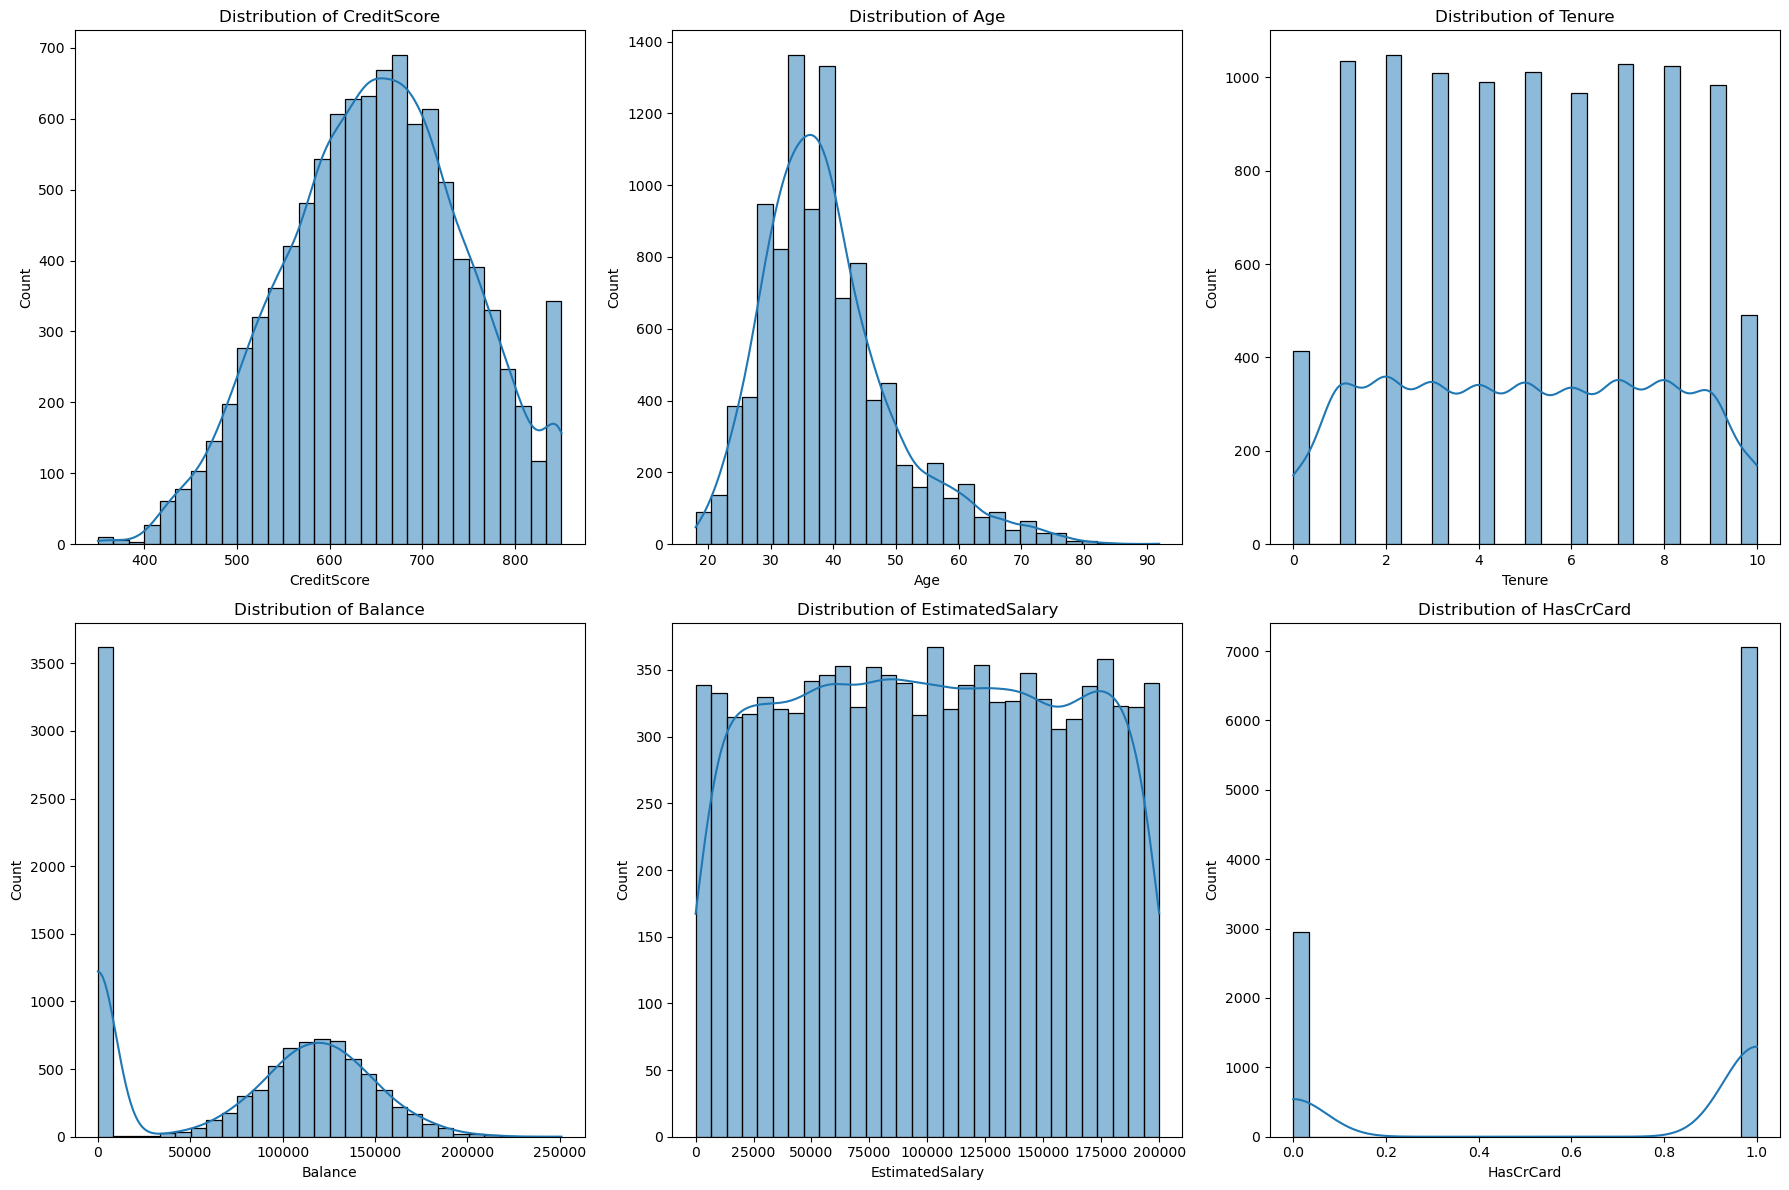

In [12]:
# Plot distribution

# Set up the matplotlib figure
plt.figure(figsize=(18, 12))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

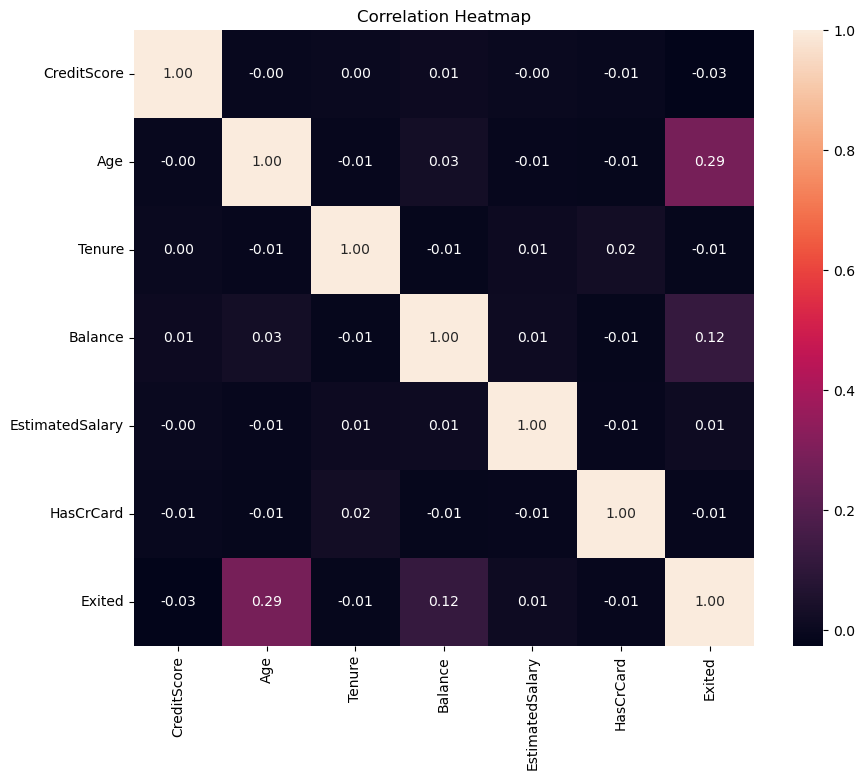

In [13]:
# Correlation matrix
corr_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary','HasCrCard','Exited']
corr_matrix = df[corr_features].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

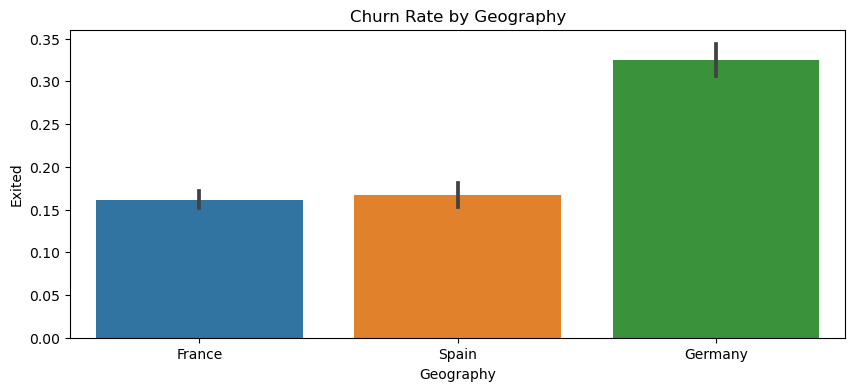

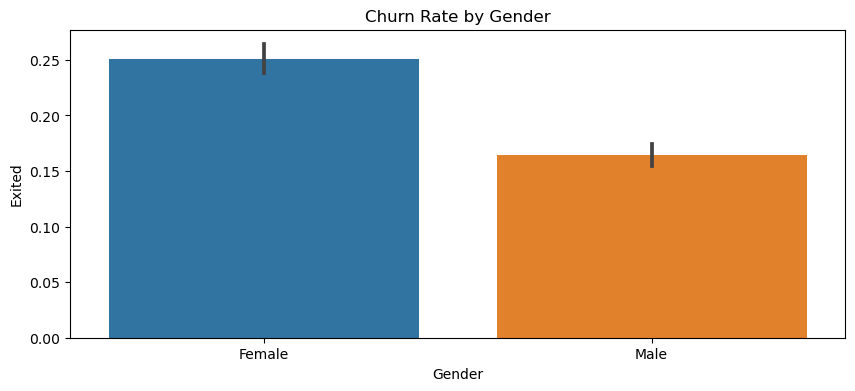

In [14]:
# Plotting
for col in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.barplot(x=col, y='Exited', data=df)
    plt.title(f'Churn Rate by {col}')
    plt.show()

C:\Users\kichha\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


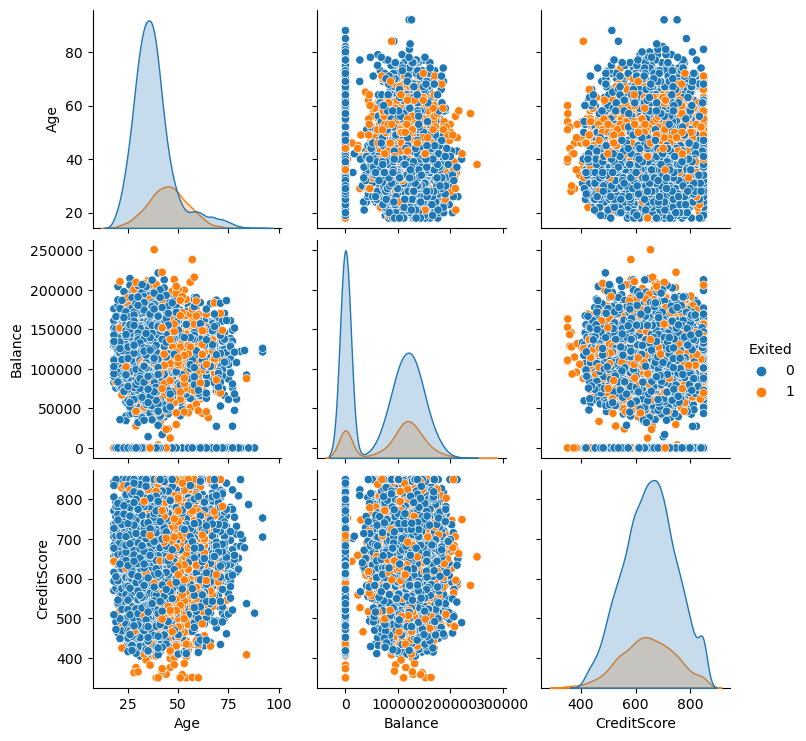

In [15]:
sns.pairplot(df[['Age', 'Balance', 'CreditScore', 'Exited']], hue='Exited')
plt.show()

In [16]:
# Create transformers for preprocessing
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define features and target variable
X = df.drop('Exited', axis=1)
y = df['Exited']

# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

Logistic Regression: CV Accuracy = 0.7885, Test Accuracy = 0.7995


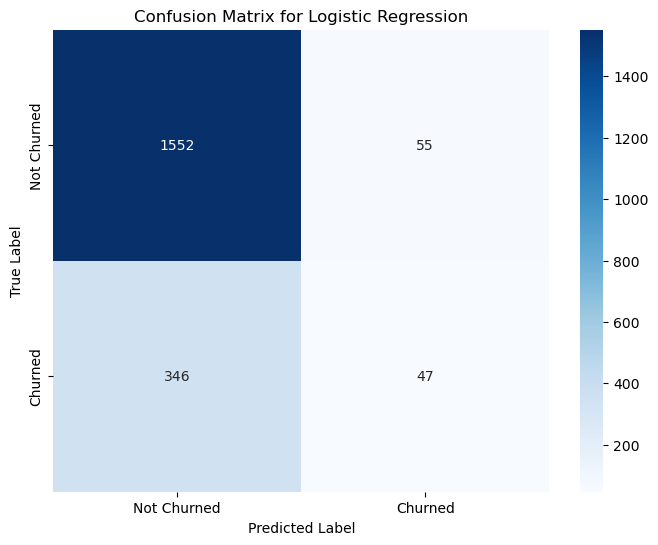

Random Forest: CV Accuracy = 0.8162, Test Accuracy = 0.8220


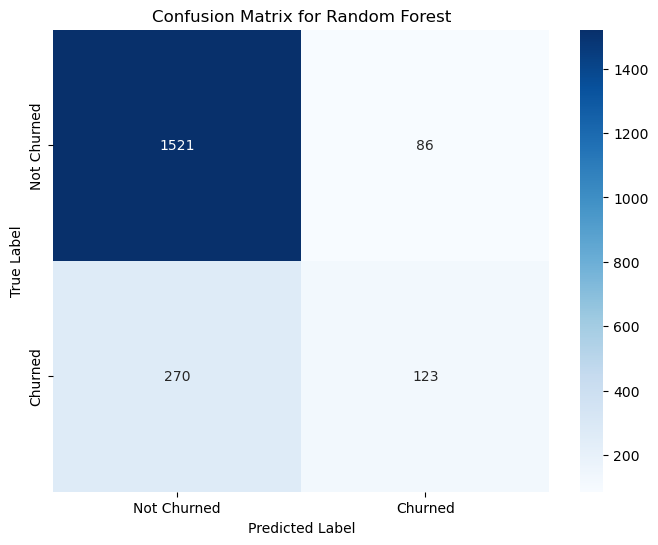

Gradient Boosting: CV Accuracy = 0.8185, Test Accuracy = 0.8310


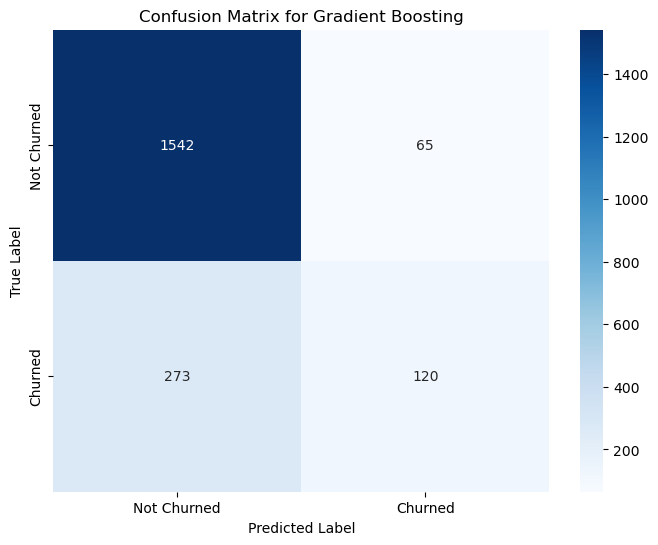

In [18]:
#Plottting the values from both predicted vs actual on a confusion matrix
results = {}

for name, model in models.items():
    # Create a pipeline with the preprocessor and the current model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    
    # Train the model using cross-validation to get a sense of its performance
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    
    # Train the model on the full training data and evaluate on the test set
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'CV Accuracy': cv_scores.mean(),
        'Test Accuracy': test_accuracy
    }
    print(f"{name}: CV Accuracy = {cv_scores.mean():.4f}, Test Accuracy = {test_accuracy:.4f}")
    cm = confusion_matrix(y_test, y_pred)

    # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Churned", "Churned"], yticklabels=["Not Churned", "Churned"])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix for '+ name )
    plt.show()